In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
imagegen = ImageDataGenerator()

##spliting the data into traning and validation data sets

In [3]:
from keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator instance for training data
train_datagen = ImageDataGenerator(
    validation_split=0.2,  # 20% of the data will be used for validation
    rescale=1./255,  # Normalize pixel values to [0, 1]
    shear_range=0.2,  # Shear intensity
    zoom_range=0.2,  # Random zoom
    horizontal_flip=True  # Random horizontal flip
)

# Load images from the directory for training
train_generator = train_datagen.flow_from_directory(
    "/content/drive/MyDrive/iris-dataset/IRIS/",
    class_mode="categorical",
    shuffle=True,  # Shuffle the data
    batch_size=128,
    target_size=(224, 224),  # Resize images to 224x224
    subset='training'  # Specify that this is for training data
)

# Load images from the directory for validation
validation_generator = train_datagen.flow_from_directory(
    "/content/drive/MyDrive/iris-dataset/IRIS/",
    class_mode="categorical",
    shuffle=True,  # Shuffle the data
    batch_size=128,
    target_size=(224, 224),  # Resize images to 224x224
    subset='validation'  # Specify that this is for validation data
)


Found 338 images belonging to 3 classes.
Found 83 images belonging to 3 classes.


##shape of the each image

In [4]:
images, labels = next(train_generator)
print("Shape of the first image:", images[0].shape)

Shape of the first image: (224, 224, 3)





##Convolution neural network (model)



In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, InputLayer, BatchNormalization, Dropout

# build a sequential model
model = Sequential()
model.add(InputLayer(input_shape=(224, 224, 3)))

# 1st conv block
model.add(Conv2D(25, (5, 5), activation='relu', strides=(1, 1), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
# 2nd conv block
model.add(Conv2D(50, (5, 5), activation='relu', strides=(2, 2), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization())
# 3rd conv block
model.add(Conv2D(70, (3, 3), activation='relu', strides=(2, 2), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='valid'))
model.add(BatchNormalization())
# ANN block
model.add(Flatten())
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=100, activation='relu'))
model.add(Dropout(0.25))
# output layer
model.add(Dense(units=3, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 25)      1900      
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 25)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 56, 56, 50)        31300     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 28, 28, 50)        0         
 g2D)                                                            
                                                                 
 batch_normalization (Batch  (None, 28, 28, 50)        200       
 Normalization)                                                  
                                                        

In [6]:
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [7]:
history = model.fit(train_generator, epochs=5,validation_data=validation_generator)

Epoch 1/5
3/3 [==============================] - 63s 16s/step - loss: 1.0515 - accuracy: 0.5740 - val_loss: 1.0371 - val_accuracy: 0.6386
Epoch 2/5
3/3 [==============================] - 35s 12s/step - loss: 0.9003 - accuracy: 0.6006 - val_loss: 1.0533 - val_accuracy: 0.6386
Epoch 3/5
3/3 [==============================] - 37s 11s/step - loss: 0.8824 - accuracy: 0.6065 - val_loss: 1.0042 - val_accuracy: 0.6386
Epoch 4/5
3/3 [==============================] - 36s 13s/step - loss: 0.7890 - accuracy: 0.6657 - val_loss: 1.0038 - val_accuracy: 0.6386
Epoch 5/5
3/3 [==============================] - 36s 10s/step - loss: 0.7132 - accuracy: 0.6923 - val_loss: 1.0224 - val_accuracy: 0.6506


##model accuracy and model loss vs epochs

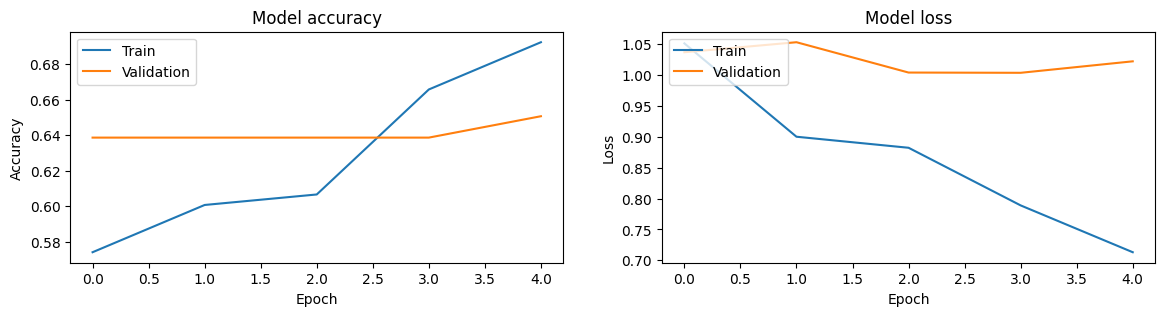

In [8]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(14, 3))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


##Tranfer learning

In [9]:
from keras.applications import VGG16

pretrained_model_full = VGG16(include_top=True, weights='imagenet',input_shape=(224,224,3))
pretrained_model_full.summary()

553467096/553467096 [==============================] - 5s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [10]:
#include top should be False to remove the softmax layer
pretrained_model = VGG16(include_top=False, weights='imagenet',input_shape=(224,224,3))
pretrained_model.summary()

58889256/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [11]:
from keras.utils import to_categorical
# extract train and val features
vgg_features_train = pretrained_model.predict(train_generator)
vgg_features_val = pretrained_model.predict(validation_generator)

1/1 [==============================] - 54s 54s/step


In [12]:
# OHE target column
train_target = to_categorical(train_generator.labels)
val_target = to_categorical(validation_generator.labels)


In [13]:
model2 = Sequential()
model2.add(Flatten(input_shape=(7,7,512)))
model2.add(Dense(100, activation='relu'))
model2.add(Dropout(0.5))
model2.add(BatchNormalization())
model2.add(Dense(3, activation='softmax'))

# compile the model
model2.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_3 (Dense)             (None, 100)               2508900   
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 batch_normalization_2 (Bat  (None, 100)               400       
 chNormalization)                                                
                                                                 
 dense_4 (Dense)             (None, 3)                 303       
                                                                 
Total params: 2509603 (9.57 MB)
Trainable params: 2509403 (9.57 MB)
Non-trainable params: 200 (800.00 Byte)
____________

In [14]:
# train model using features generated from VGG16 model
history_1 = model2.fit(vgg_features_train, train_target, epochs=25, batch_size=128, validation_data=(vgg_features_val, val_target))

Epoch 1/25
3/3 [==============================] - 2s 207ms/step - loss: 1.3048 - accuracy: 0.3432 - val_loss: 2.3422 - val_accuracy: 0.1566
Epoch 2/25
3/3 [==============================] - 0s 92ms/step - loss: 1.1387 - accuracy: 0.4408 - val_loss: 1.8603 - val_accuracy: 0.1566
Epoch 3/25
3/3 [==============================] - 0s 92ms/step - loss: 1.0309 - accuracy: 0.4882 - val_loss: 1.3466 - val_accuracy: 0.3494
Epoch 4/25
3/3 [==============================] - 0s 97ms/step - loss: 0.9018 - accuracy: 0.5769 - val_loss: 1.2122 - val_accuracy: 0.3735
Epoch 5/25
3/3 [==============================] - 0s 92ms/step - loss: 0.9004 - accuracy: 0.5473 - val_loss: 1.1129 - val_accuracy: 0.4819
Epoch 6/25
3/3 [==============================] - 0s 102ms/step - loss: 0.7879 - accuracy: 0.6272 - val_loss: 1.1332 - val_accuracy: 0.5181
Epoch 7/25
3/3 [==============================] - 0s 88ms/step - loss: 0.7079 - accuracy: 0.6982 - val_loss: 1.2315 - val_accuracy: 0.4699
Epoch 8/25
3/3 [=========

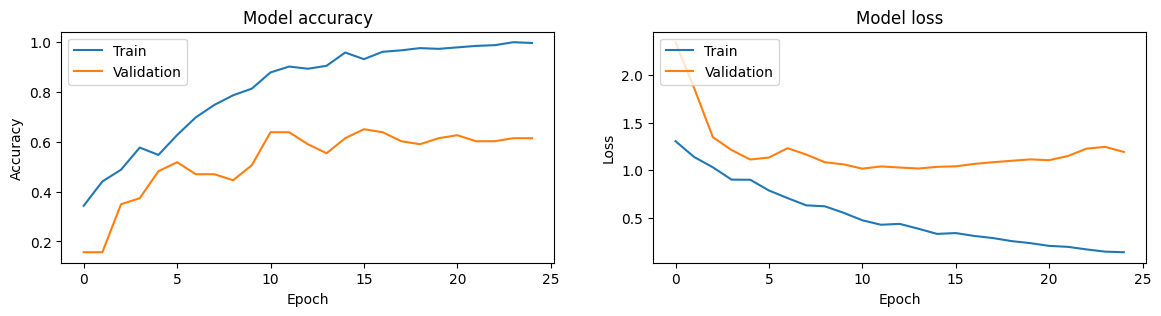

In [15]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(14, 3))

plt.subplot(1, 2, 1)
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()